# CSX46 - Class Session 7 - Pagerank centrality

In this class session we are going to compute the outgoing-edge PageRank centrality of each gene (vertex) in a human gene regulatory network (a directed graph) from a landmark paper on human gene regulation (Neph et al., Cell, volume 150, pages 1274-1286, 2012; see PDF on Canvas). We'll also implement our own PageRank and compare it to the `igraph::page_rank` function.

Let's start by having a look at the Neph et al. data file, `neph_gene_network.txt`.  It is in edge-list format, with no header and no "interaction" column.  Just two columns, first column contains the "regulator gene" and the second column contains the "target gene":

    head neph_gene_network.txt
    AHR     BCL6
    AHR     BHLHE41
    AHR     BPTF
    AHR     CEBPA
    AHR     CNOT3
    AHR     CREB1

Now let's load the packages that we will need for this exercise

In [1]:
suppressPackageStartupMessages(library(igraph))

Using `read.table`, read the file `shared/neph_gene_network.txt`; name the two columns of the resulting data frame, `regulator` and `target`.  Since there is no header, we will use `header=FALSE`:

In [2]:
edge_list_neph <- read.table("shared/neph_gene_network.txt",
                            header=FALSE,
                            sep="\t",
                            stringsAsFactors=FALSE,
                            col.names=c("regulator","target"))

Load the edge-list data into a directed Graph object in igraph, using `graph_from_data_frame`. *Make sure to reverse the columns of the data frame when you input the data frame into `graph_from_data_frame`, since we want the outgoing pagerank centrality not incoming pagerank centrality.* Print out a summary of the graph. 

In [4]:
neph_graph <- graph_from_data_frame(edge_list_neph[,c(2,1)], directed=TRUE)
summary(neph_graph)

IGRAPH d6906e8 DN-- 538 47945 -- 
+ attr: name (v/c)


Compute the pagerank centrality measures of all vertices, using `page_rank`. The `page_rank` function will return a list.  You want list item `vector`.

In [6]:
pageranks <- page_rank(neph_graph)$vector

Which vertex has highest pagerank centrality in the gene regulatory network, and what is its pagerank centrality value? (think `which.max`). 

In [8]:
which.max(pageranks)

FOS 
119

Calculate the in-degree of all vertices in the graph, and scatter plot `log(degree)` vs. `log(pagerank)`.  (Do you see why we used `in` here?  Note the column swapping we did earlier)

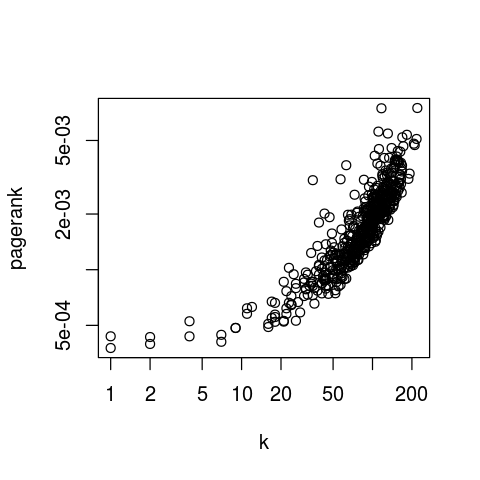

In [11]:
degree_vals <- degree(neph_graph, mode="in")
plot(degree_vals[degree_vals > 0], 
     pageranks[degree_vals > 0], 
     xlab=expression(k), 
     ylab="pagerank", 
     log="xy")

In [9]:
which.max(degree(neph_graph, mode="in"))

FOS 
119

See if you can calculate the pagerank centrality yourself, using the matrix inversion (Eq. 7.19 from Newman). Test your function on a small directed graph.

In [119]:
set.seed(1337)

my_page_rank <- function(g) {
    # get the number of vertices N
    N <- length(V(g))
    
    # alpha is the damping parameter, set to 0.85
    alpha <- 0.85
    
    # beta = (1-alpha)/N
    beta = (1-alpha)/N
    
    # get the out-degree values of all the vertices
    degree_values <- degree(g, mode="out")
    
    # get the adjacency matrix; take transpose to get it into Newman format
    M <- t(as.matrix(get.adjacency(g)))
    
    # for each column j of M, divide it by the out-degree of vertex j (unless the outdegree of vertex j is zero;
    # in that case set the column j of M to zero):
    M <- sapply(1:N,
               function(col_ind) {
                   degree_value <- degree_values[col_ind]
                   if (degree_value > 0) {
                       M[, col_ind]/degree_value
                   } else {
                       rep(0, N)
                   }
               })
    
    # use the equation from the board to compute the pagerank, as the vector "pr"
    pr <- (solve(diag(N) - alpha*M) %*% rep(beta,N))[,1]
    
    # normalize the "pr" vector to unity
    pr / sum(pr)
}

Test out your homegrown pagerank function on a small five-vertex graph:

[1] 0.4243328 0.1824414 0.1889527 0.1021366 0.1021366
[1] 0.4243328 0.1824414 0.1889527 0.1021366 0.1021366


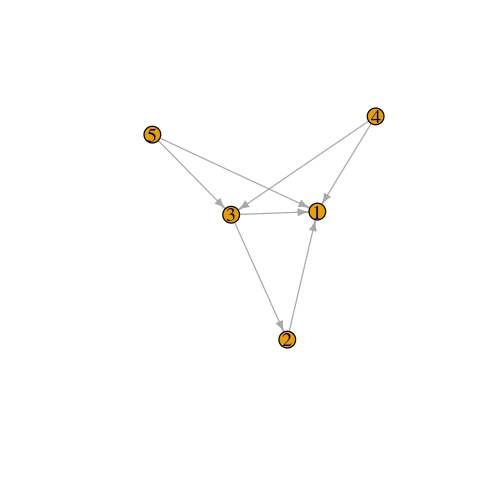

In [118]:
g <- barabasi.game(n=5, m=2, directed=TRUE)
plot(g)

my_pageranks <- my_page_rank(g)
print(my_pageranks)
official_pageranks <- page_rank(g, algo="prpack")$vector
print(official_pageranks)